<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

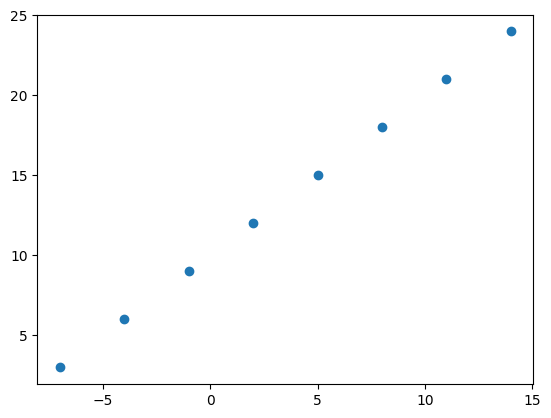

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

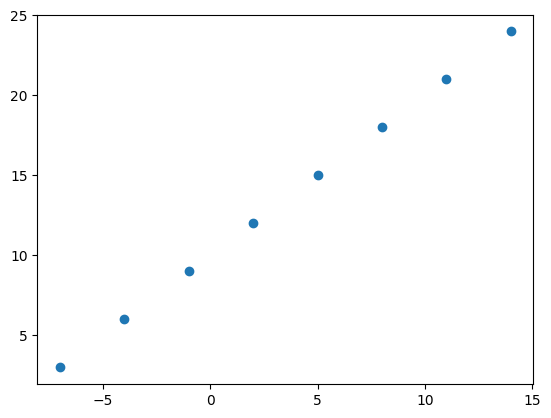

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the
function which tells our model how wrong it is) and the optimizer
(tells our model how to improve the patterns its learning) and
evaluation metrics (what we can use ta interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.7016 - mae: 10.7016
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 10.4516 - mae: 10.4516
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 10.1861 - mae: 10.1861
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 9.9039 - mae: 9.9039
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 9.6035 - mae: 9.6035


In [ ]:
# Check out X, and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 268ms/step


array([[19.985455]], dtype=float32)

In [ ]:
y_pred + 18

array([[37.985455]], dtype=float32)

## Improving our model

We can improve our model, by astering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 549ms/step - loss: 8.4661 - mae: 8.4661
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 8.3336 - mae: 8.3336
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 8.2011 - mae: 8.2011
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0686 - mae: 8.0686
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9361 - mae: 7.9361
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.8036 - mae: 7.8036
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.6711 - mae: 7.6711
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5386 - mae: 7.5386
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 149ms/step


array([[29.980179]], dtype=float32)

### Create a new model

In [ ]:
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.5433 - mae: 13.5433
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 13.1636 - mae: 13.1636
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 12.7777 - mae: 12.7777
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 12.3602 - mae: 12.3602
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 11.9167 - mae: 11.9167
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 11.4181 - mae: 11.4181
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 10.8445 - mae: 10.8445
Epoch 8/100
1/1 [==============================] - 0s 55ms/step - loss: 10.1519 - mae: 10.1519
Epoch 9/100
1/1 [==============================] - 0s 55ms/step - loss: 9.2733 - mae: 9.2733
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 8.1727 - mae: 8.1727
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 1s 530ms/step


array([[32.68552]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.4277 - mae: 14.4277
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 14.3586 - mae: 14.3586
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 14.2895 - mae: 14.2895
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 14.2205 - mae: 14.2205
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.1516 - mae: 14.1516
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0827 - mae: 14.0827
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 14.0138 - mae: 14.0138
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 13.9450 - mae: 13.9450
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 13.8761 - mae: 13.8761
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 13.8073 - mae: 13.8073
Epoch 11/100
1/1 [==============================] -

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 193ms/step


array([[27.629501]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

# When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100.0, 100.0, 4)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

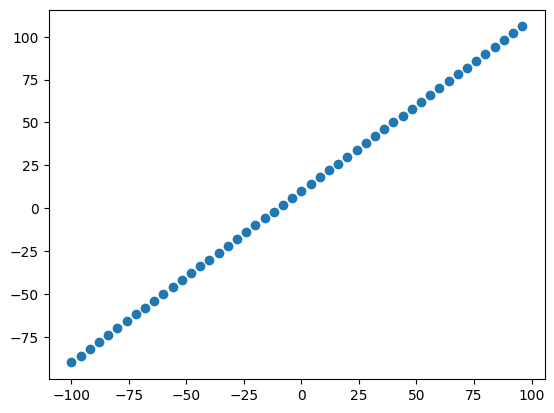

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which typically
constitutes 70-80% of the total available data.
* **Validation set** - the model is fine-tuned on this data, typically representing 10-15% of the available data.
* **Test set** - the model is evaluated on this data to assess what it has learned; this set typically accounts for 10-15% of the total available data.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

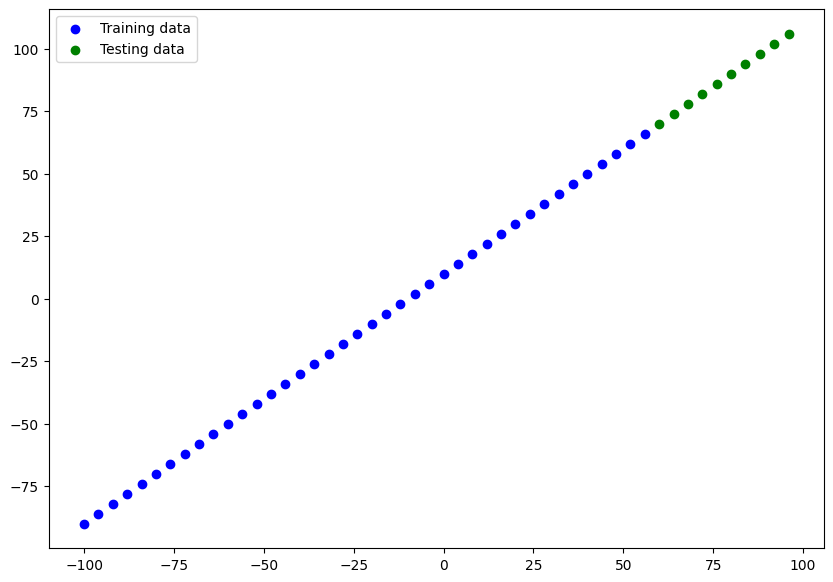

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # Fit
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

### Visualizing the model

In [ ]:

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer1"),
    tf.keras.layers.Dense(10, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model.
* Trainable parameters -these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true`
versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
 # Let's create a plotting function
def plot_predictions(training_data=X_train,
                      training_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
   """
   Plots training data, test data and compares predictions to ground truth labels.
   """

   plt.figure(figsize=(10, 7))
   # Plot training data in blue
   plt.scatter(training_data, training_labels, c='b', label="Training data")
   # Plot testing data in green
   plt.scatter(test_data,test_labels, c='g', label="Testing data")
   #Plot model's predictions in red
   plt.scatter(test_data, predictions, c='r', label="Predictions")
   # Show the legend
   plt.legend();

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]


len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, name="input_layer0"),
    tf.keras.layers.Dense(15, name="input_layer1"),
    tf.keras.layers.Dense(13, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# Compile
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# fit
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=190, verbose=1)

In [ ]:
# Make some predictions
y_pred = model2.predict(X_test)
y_pred

In [ ]:
plot_predictions(training_data=X_train,
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors."

In [ ]:
# Evaluate the model on the test
model2.evaluate(X_test, y_test)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                              y_pred=tf.constant(y_pred))
mae

In [ ]:
tf.constant(y_pred)

In [ ]:
y_test

In [ ]:
# Let's get rid of that one dimension (10, 1) --> (10,)
tf.squeeze(y_pred)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
X_train.ndim, y_train.ndim

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=500)

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* **Weights & Biases** - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving out models

Saving our models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formatns we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

## Download a model (or any other file from Google Colab)

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab_Notebooks/tensorflow_coure

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/tensorflow_coure

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
insurance["smoker"], insurance["age"]

In [ ]:
# Let's try one-hot encode our Dataframe so it's all numbers\
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

In [ ]:
# View y
y.head()

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=(0.008)),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

In [ ]:
y_train.median(), y_train.mean()

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

 1. Add an extra layer with more hidden units and use the Adam optimizer
 2. Same as above but train for longer (200 epochs)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

In [ ]:
# Evaluate our model
insurance_model_3.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


### How long should you train for?

It depends on the problem, but TensorFlow has a solution! It's called the **EarlyStopping Callback**.
It is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fit on our normalized data

# Set random seed

tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)




Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.4375 - mae: 13343.4375
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.1025 - mae: 13334.1025
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13311.0420 - mae: 13311.0420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13263.7803 - mae: 13263.7803
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13181.3291 - mae: 13181.3291
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13052.7070 - mae: 13052.7070
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12867.8750 - mae: 12867.8750
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12616.8418 - mae: 12616.8418
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12289.4492 - mae: 12289.4492
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11882.23

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3435.2947 - mae: 3435.2947


[3435.294677734375, 3435.294677734375]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 5084.3560 - mae: 5084.3560

<Axes: ylabel='Frequency'>

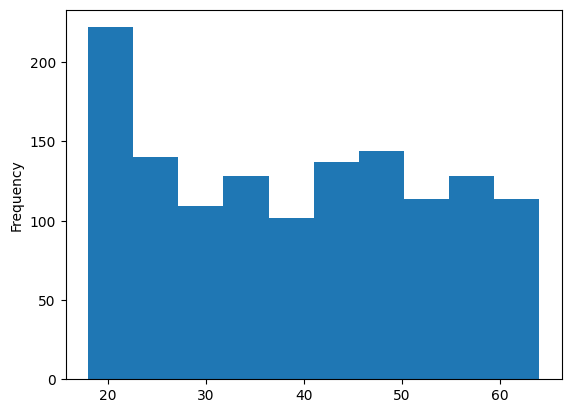

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

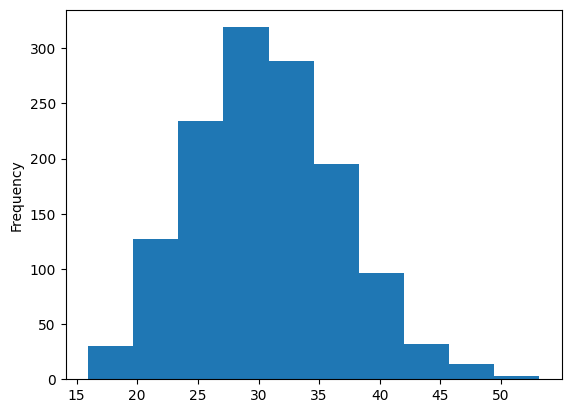

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Exercise
 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  - Building a larger model (how does one with 4 dense layers go?).
  - Increasing the number of units in each layer.
  - Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
  - What happens if you train for longer (say 300 epochs instead of 200)?
 4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
X = np.arange(3, 280, 3)
y = np.arange(2, 746, 8)

tf.size(X), tf.size(y)

(<tf.Tensor: shape=(), dtype=int32, numpy=93>,
 <tf.Tensor: shape=(), dtype=int32, numpy=93>)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

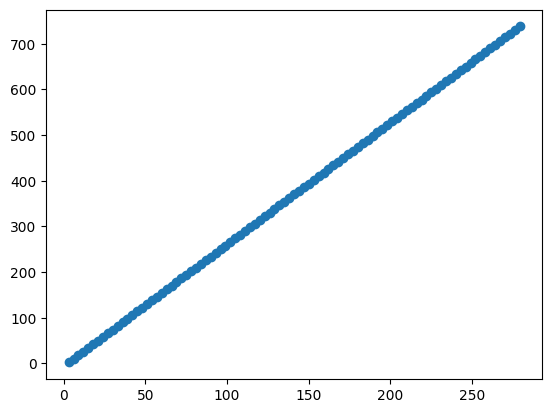

In [28]:
plt.scatter(X, y)

In [29]:
tf.random.set_seed(42)

In [30]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.002),
                metrics=["mae"])

model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=370, verbose=0)

In [31]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 1s 636ms/step - loss: 1.9111 - mae: 1.9111


[1.9111400842666626, 1.9111400842666626]

### Model_5

In [32]:
# 4. Import the Boston pricing dataset from TensorFlow tf.keras.dataset and model it

In [36]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz",
    test_split=0.2,
    seed=42
)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [57]:
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    #tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["mae"])

# Fit the model
history = model_5.fit(X_train, y_train, epochs=180)

Epoch 1/180
13/13 [==============================] - 1s 3ms/step - loss: 63.6976 - mae: 63.6976
Epoch 2/180
13/13 [==============================] - 0s 3ms/step - loss: 26.0123 - mae: 26.0123
Epoch 3/180
13/13 [==============================] - 0s 3ms/step - loss: 14.3392 - mae: 14.3392
Epoch 4/180
13/13 [==============================] - 0s 2ms/step - loss: 10.0804 - mae: 10.0804
Epoch 5/180
13/13 [==============================] - 0s 3ms/step - loss: 10.7432 - mae: 10.7432
Epoch 6/180
13/13 [==============================] - 0s 2ms/step - loss: 8.5321 - mae: 8.5321
Epoch 7/180
13/13 [==============================] - 0s 3ms/step - loss: 9.5198 - mae: 9.5198
Epoch 8/180
13/13 [==============================] - 0s 3ms/step - loss: 6.7843 - mae: 6.7843
Epoch 9/180
13/13 [==============================] - 0s 3ms/step - loss: 6.9087 - mae: 6.9087
Epoch 10/180
13/13 [==============================] - 0s 3ms/step - loss: 8.0901 - mae: 8.0901
Epoch 11/180
13/13 [=============================

In [58]:
model_5.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.9736 - mae: 3.9736


[3.973590850830078, 3.973590850830078]

Text(0.5, 0, 'epochs')

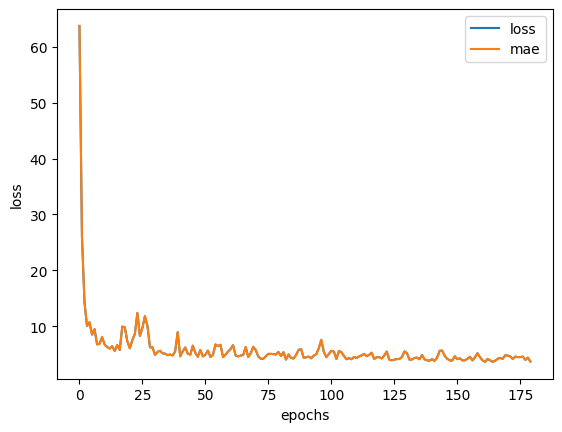

In [59]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")